## Confidence interval

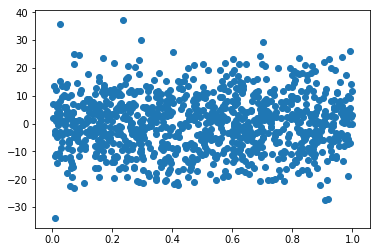

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

x = np.sort(stats.uniform.rvs(size=1000))
noise = stats.norm.rvs(scale=10, size=len(x))
y = np.power(x, 2) + noise

plt.scatter(x, y)

Let say we want to extract some patterns

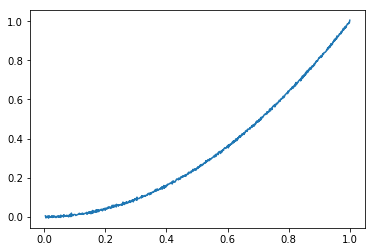

In [82]:
import pandas as pd
sample_numbers = 100000

df = pd.DataFrame(np.array([np.power(x, 2) + stats.norm.rvs(scale=1, size=len(x)) 
                            for i in range(sample_numbers)]), 
                 columns=["col" + str(i) for i in range(len(x))])

plt.plot(x, df.mean(0))

In [3]:
stat_df = df.apply(lambda x: pd.Series([np.mean(x), np.std(x)], index=["Mean", "Std"]), 1)
stat_df

,Mean,Std
0,0.001361,1.002186
1,0.006800,1.004252
2,-0.001039,0.999072
3,0.002251,0.996916
4,-0.002704,1.000981
5,-0.002559,0.995271
6,-0.000989,0.994688
7,0.001009,0.998376
8,-0.004188,1.001309
9,0.000020,1.001243


In [88]:
stats.t.ppf(0.975, df=sample_numbers)

1.9599877075346093

<Container object of 3 artists>

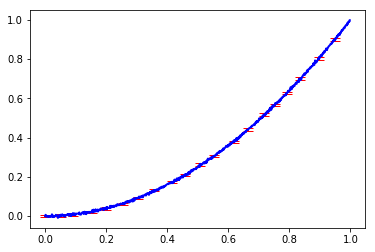

In [4]:
plt.errorbar(x, stat_df["Mean"],
             yerr=1.96*stat_df["Std"] / np.sqrt(sample_numbers), 
             lw=2, color="b", label="Average", errorevery=50, ecolor="r", capsize = 5)

## Computing $\pi$

We consider a the quarter of a circle of radius $r$ within a square of length $r$. The Square surface area is $S_s=r^2$ and the surface area of a fourth of disk is $S_c=\pi r^2/4$. Therefore $S_c / S_s= \pi/4$

In [5]:
N = 10000

x = np.random.uniform(size=N)
y = np.random.uniform(size=N)

inside_circle = sum(np.power(x, 2) + np.power(y, 2) <= 1)
inside_square = N
pi_4 = inside_circle / inside_square

4 * pi_4

3.1415999999999999

$3.14364\pm 2\frac{\sigma}{\sqrt{N}}$.

The variance of a Bernouilli variable $\sigma^2=p(1-p)$ with $p=\frac{\pi}{4}$

In [6]:
margin = 2. * np.sqrt(pi_4 * (1 - pi_4) / N)

4 * pi_4 - margin, 4 * pi_4, 4 * pi_4 + margin

(3.1333891086963717, 3.1415999999999999, 3.1498108913036282)

## Bootstrap method for Confidence interval

Let's say we want to compute confidence interval from data with unknown distribution

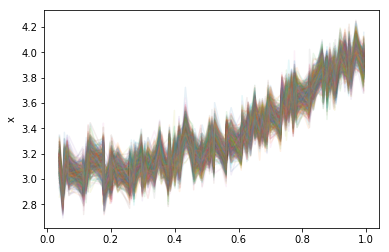

In [96]:
import pandas as pd
from sklearn.utils import resample
sample_numbers = 1000
x = np.sort(stats.uniform.rvs(size=100))

mat = np.array([np.power(x, 2) + stats.chi2.rvs(df=3, size=len(x)) for i in range(sample_numbers)])

for i in range(500):
#     mat_boot = resample(mat, replace=True)
    mat_boot = np.array([resample(vec, replace=True) for vec in mat.T]).T
    plt.plot(x, mat_boot.mean(0), alpha=0.1)
plt.ylabel("average")
plt.ylabel("x")

In [97]:
import pandas as pd
from sklearn.utils import resample
sample_numbers = 1000
x = np.sort(stats.uniform.rvs(size=100))

mat = np.array([np.power(x, 2) + stats.chi2.rvs(df=3, size=len(x)) for i in range(sample_numbers)])

mat_means = [resample(mat).mean(0) for i in range(10000)]
# mat_means = [np.array([resample(vec, replace=True) for vec in mat.T]).T.mean(0) for i in range(10000)]
mat_means

[array([ 2.85245218,  3.07624146,  2.89680922,  3.09837476,  3.00820836,
         3.04522116,  3.00145404,  2.90075873,  3.27853387,  3.07663446,
         3.02829853,  3.26472387,  2.94082474,  3.03671947,  3.01422151,
         2.98000173,  3.03872738,  3.026258  ,  3.02395446,  2.92699969,
         2.92779013,  2.83733999,  2.98369418,  3.0799151 ,  3.17744698,
         3.01322461,  3.02019955,  3.08770388,  3.0749367 ,  3.04711089,
         3.13635446,  3.10253272,  2.96977628,  3.26911145,  2.96954958,
         3.3412965 ,  3.17484676,  3.17013737,  3.20834204,  3.20638019,
         3.15309092,  3.20840278,  3.17755331,  3.10782883,  3.32859296,
         3.15121886,  3.44447896,  3.32430889,  3.13287589,  3.25127706,
         3.19477845,  3.17926161,  3.27076834,  3.23680867,  3.29321329,
         3.40471609,  3.40899412,  3.37529076,  3.42697648,  3.36875002,
         3.46760759,  3.59489449,  3.49052261,  3.46304308,  3.51157159,
         3.54015198,  3.53422765,  3.58017702,  3.6

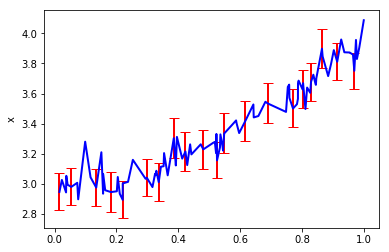

In [98]:
perc5 = np.percentile(mat_means, 5, axis=0)
perc95 = np.percentile(mat_means, 95, axis=0)

plt.errorbar(x, mat.mean(0),
             yerr=[mat.mean(0) - perc5, perc95 - mat.mean(0)], 
             lw=2, color="b", label="Average", errorevery=5, ecolor="r", capsize = 5)

plt.ylabel("average")
plt.ylabel("x")

## Test statistics

In [73]:
from scipy import stats

x1 = stats.norm.rvs(size=100, loc=1)
x2 = stats.norm.rvs(size=100, loc=0)

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=7.9162263097273735, pvalue=1.7114573396401043e-13)

In [80]:
x1 = stats.norm.rvs(size=1000, loc=0.10115)
x2 = stats.norm.rvs(size=1000, loc=0)
x3 = stats.norm.rvs(size=1000, loc=0)

stats.f_oneway(x1, x2, x3)

F_onewayResult(statistic=3.1526300528469204, pvalue=0.042881346755447969)

/Users/damien.benveniste/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1421: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)
/Users/damien.benveniste/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1421: RuntimeWarning: invalid value encountered in multiply
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


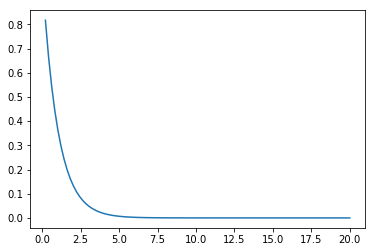

In [67]:
x = np.linspace(0, 20, 100)

df1 = 3 - 1
df2 = 3 * (1000 - 1)

f_pdf = stats.f.pdf(x, df1, df2)

plt.plot(x, f_pdf)

In [68]:
# Percent point function (inverse of cdf — percentiles).

stats.f.ppf(0.95, df1, df2)

2.9987287350990011